# Week 6: Model Training
# Tutorial Module

This week, having laid the groundwork with an understanding of what logistic regression is and its role in predicting categorical outcomes, we are now ready to focus exclusively on how to train a logistic regression model effectively.

Training is a crucial phase where the model is exposed to data, allowing it to learn the relationship between input features and the target variable. This stage is critical for applications in biology, where logistic regression can be instrumental in tasks like predicting the presence of a genetic trait, determining the likelihood of a medical condition, or classifying species in ecological studies.

Throughout this module, we will concentrate on the following aspects of the model training process:

1. Loss Function
2. Gradient Descent
3. Validation Set
4. Hyperparameter Tuning

By focusing on these key areas, you will gain a deeper understanding of the logistic regression training process and how to apply it to biological data using Python. Let's embark on this detailed exploration of model training within the fascinating intersection of machine learning and biology. Below is the code from last week to perform all the preprocessing necessary and reach the training portion of the code.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# machine learning
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('bc_data.csv', index_col=0)

print(f"Shape of original dataset: {df.shape}")

# Data cleaning

# encode target feature to binary class and split target/predictor vars
y = df["diagnosis"].map({"B" : 0, "M" : 1})
x = df.drop("diagnosis", axis = 1)

# drop all "worst" columns
cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst']
x = x.drop(cols, axis=1)

# drop perimeter and area (keep radius)
cols = ['perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se']
x = x.drop(cols, axis=1)

Shape of original dataset: (569, 31)


## Loss Function
Before we go into how we will train our model, lets specify what we are training our model for.

Gradient descent is a fundamental optimization algorithm in machine learning, primarily used to minimize a function, which in this context is the <span style="background-color: #AFEEEE">**loss function**</span>. The loss function, often synonymous with the objective or cost function, is a crucial component in this process. They are mathematical formulations used to quantify the difference between the predicted output of a model and the actual data. Or in other words, it evaluates the performance of the model for each input, quantifying how 'off' or 'wrong' the model's predictions are compared to the actual values. The goal of gradient descent is to minimize this function, thereby improving the model's accuracy. It may help to imagine the loss function as a hill, where you want to slowly traverse it based on its slope to find the lowest valley. 

<img src="image1.jpeg" alt="Drawing" style="width: 600px;" class="center"/>

<a href="https://blog.gopenai.com/understanding-of-gradient-descent-intuition-and-implementation-b1f98b3645ea">Source</a>

## Understanding Gradient Descent

Many of you might already have a solid foundation in statistics and are familiar with generalized mixed models, including logistic regression which extends from linear regression. However, the approach we're going to explore here differs slightly. As well, don't worry, those who have not taken these courses can also grasp the basic underlying steps that we will be highlighting here. When you potentially learned logistic regression in statistics, our focus was primarily on computing the <span style="background-color: #AFEEEE">**closed-form**</span> solutions directly. These solutions provide exact answers derived from the mathematical equations of the model. However, it's important to recognize that computing closed-form solutions isn't always feasible or desirable, especially in certain contexts.

For instance, when dealing with large datasets, finding these closed-form solutions can be computationally expensive and time-consuming. Moreover, in the realm of many machine learning models, closed-form solutions may not even exist due to the complexity and high dimensionality of the data. This is where alternative methods like gradient descent come into play. The use of gradient descent makes the training process adaptable and scalable for high-dimensional data, which is often the case in biology where datasets can include thousands of features from genetic markers to pixel data from medical images

The process of gradient descent involves iteratively taking steps towards the minimum of the loss function. In the end, we have a model with its weight values set based on context from our dataset. However, to get there, each step through the loss function in this process has two essential aspects: its direction and its size.

<span style="background-color: #AFEEEE">-  **Direction:**</span> The direction of each step is determined by the gradient of the function at the current point. The gradient is a vector that points in the direction of the steepest ascent – the direction in which the function increases most rapidly. However, since the goal is to minimize the function, gradient descent takes steps in the opposite direction of the gradient. By moving against the gradient, the algorithm descends towards the function's minimum.

<span style="background-color: #AFEEEE">-  **Size:**</span> The size of each step is proportional to the gradient. If the steps are too large, the algorithm might overshoot the minimum; if they are too small, the descent could be very slow or get stuck in a local minimum. The speed in which the model "learns" needs to be carefully chosen to ensure efficient and effective convergence to the minimum.

## Working with Gradient Descent

To effectively utilize gradient descent, a significant part of our task involves determining the optimal frequency and magnitude of the steps we take. This brings us to the concept of <span style="background-color: #AFEEEE">**hyperparameters**</span>. Unlike model weights/parameters, which are learned from the data, hyperparameters are settings that we must define before training the model. All machine learning models have hyperparameters, with two common ones being the <span style="background-color: #AFEEEE">**learning rate**</span> and the number of <span style="background-color: #AFEEEE">**epochs**</span>.

In essence, gradient descent works by iteratively moving in the direction opposite to the gradient, with the magnitude of each step influenced by the learning rate. This iterative process continues until the algorithm <span style="background-color: #AFEEEE">**converges**</span>, which occurs when additional steps fail to significantly reduce the value of the loss function, suggesting that the minimum (or a local minimum) has been reached. The determination of step size and the total number of steps involves setting specific hyperparameters.

<span style="background-color: #AFEEEE">- **Learning Rate (Alpha)**</span>: The learning rate, often denoted as alpha, controls the size of each step. A lower learning rate results in smaller steps, and a higher rate leads to larger steps. The choice of learning rate is crucial as it affects the performance of the model, influencing how quickly or slowly it converges to the minimum.

<span style="background-color: #AFEEEE">- **Epochs**</span>: An epoch, essentially an iteration, represents one complete pass through the entire dataset. The number of epochs determines how many times the model will traverse the gradient. Setting this number too low might prevent the model from reaching the minimum, while a very high number could lead to unnecessarily long training times. It's important to choose a value that allows the model to reach the minimum efficiently.

In practical terms, when working with a tool like `SGDClassifier()`, you'll encounter object parameters such as `max_iter` and `alpha`. These represent the hyperparameters we can control: `max_iter` sets the number of epochs, dictating how many times the model will iterate over the dataset, and `alpha` specifies the learning rate. An example of this implementation was seen in week 5 with our analysis of the breast cancer dataset. Here, explicitly, we are using an alpha/learning rate of 0.00001 and 5 epochs.

| Function | Input parameters | Output | Syntax |
| --- | --- | --- | --- |
| .fit() | Numpy array(s) | returns a History object containing training and validation metrics | model.fit(x_train, y_train) |
| .score() | Numpy array(s) | returns a performance metric that is specific to the type of model | model.score(x_test, y_test) |

In [69]:
# Splitting the dataset to a training and a testing dataset
test_ratio = 0.15
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio, random_state=40)

In [78]:
# Load the model
model = SGDClassifier(loss='log_loss', alpha=1e-5, max_iter=5)

# Fit the model on the training data
model.fit(x_train, y_train)

# Evaluate the model on the validation data
test_score = model.score(x_test, y_test)
print(f"Test Accuracy: {test_score}")

Test Accuracy: 0.686046511627907


c:\Users\edwar\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


It seems our current model's performance is not as high as we hoped, returning a poor accuracy. This could be a sign that our model's hyperparameters need adjusting. For our case, it seems like the model may benefit from additional training time or a different learning rate. You might have also received a warning by sklearn specifically stating so.

Before we move on, run the previous cell a few more time. You may see that the accuracy produced seems random. This is because we may start at various random locations on this gradient; the weights that are initialized are random. 

**Q1. In the code snippet below, try to alter the `alpha` and `max_iter` values until you get an accuracy above 80% on you test set.**

<span style="background-color: #FFD700">**Write your code below**</span>

In [ ]:
# Load the model


# Fit the model on the training data


# Evaluate the model on the validation data


You might feel a sense of accomplishment after achieving good accuracy on the test set, but this could be a case of <span style="background-color: #AFEEEE">**overfitting**</span>. Hence the question arises: how should we test the effectiveness of our hyperparameter tuning without falling into this trap? It's crucial to understand that using the test set for evaluating hyperparameter choices can inadvertently lead to overfitting on the test dataset itself. This happens because, even though we're not explicitly including the test set in the training process, we're still allowing the test data to influence our model's training indirectly through our decisions.

To avoid this pitfall, we need a different strategy. Instead of relying on the test set for tuning hyperparameters, we should partition our data differently. We'll set aside a portion of our training set to create what's known as a <span style="background-color: #AFEEEE">**validation set**</span>. This validation set acts as a pseudo-test set, allowing us to evaluate our model and its hyperparameters without compromising the integrity of the actual test set. By using this approach, we ensure that our model is tuned effectively without being biased by the test data, leading to a more robust and generalizable performance.

## Validation Set
For validating our trained model, we require some data points from the training set. We can't split with data from the test set because the test set is meant to be a completely independent subset of data used to evaluate the final performance of the model (it also only contains a low number of samples from the original dataset).The test set should mimic new, unseen data that the model may encounter in a real-world scenario, hence, it should not influence the model training or tuning process in any way.

The main function of a validation set is to offer a fair assessment of a model that's been trained on a dataset, especially during the adjustment of its hyperparameters. Thus, we further remove another subset of our training set to create this new validation set.

In [27]:
# Data splitting
# train (70%), val (15%), test (15%)
train_ratio = 0.7
val_ratio = 0.15

# Splitting the training from the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_ratio/(train_ratio + val_ratio), random_state=40)

It is important that the validation set is kept separate from the training set and is not used in the training process (you won't get a good grasp at your knowledge if you view the mock exam beforehand). This separation ensures that the validation performance is a good indicator of how well the model generalizes to new, unseen data. The test set is then used as the final performance metric, as it remains untouched and completely independent throughout the model development process.

<img src="image2.png" alt="Drawing" style="width: 600px;" class="center"/>


Once these three sets are made, we can now train our model over a series of iterations until we are confident it may perform well on our test set, new unseen data.

**Q2. Let's experiment with different number of epochs/iterations. Specifically, we will test what happens if we were to increase the number from 5 epochs to 10, to 50 and finally, 100. Below, there are three code cells for you to fill out. Copy the code above and change the `max_iter` parameter. Remember to set `random_state` to 1**

<span style="background-color: #FFD700">**Write your code below**</span> 

In [ ]:
# Max iterations of 10

# Fit the model on the training data

# Evaluate the model on the validation data

In [ ]:
# Max iterations of 50

# Fit the model on the training data

# Evaluate the model on the validation data

In [ ]:
#Max iterations of 100

# Fit the model on the training data

# Evaluate the model on the validation data

**Q3. After making these changes, observe how the test accuracy has shifted. Did it improve? If so, explain why conceptually do you think that increasing the number of epochs helped in this case. What oddity do you observe when you compare 50 to 100 epochs? Why may that be?**

<span style="background-color: #FFD700">**Write Answer Here**</span> 

Let's now shift our focus to examining the impact of varying the learning rate. By experimenting with significantly high and low values of the learning rate, we can observe how taking steps that are either too large or too small affects our training process. This exploration will help us understand the consequences of extreme adjustments in the learning rate.

Although the point of machine learning is to have a model "learn" the patterns in our dataset for us, there are still many parts of the process under our control obviously; hence, there is always room for human error and for us to improve. An issue that frustrates most beginners is most certainly hyperparameter tuning.

### Misunderstanding the Learning Rate
<span style="background-color: #AFEEEE">- **Scale and Impact**</span>: A common misconception is underestimating the impact of its scale. For instance, a learning rate of 0.1 is not just slightly larger than 0.01; it's actually ten times larger. This significant increase can lead to very different training behaviors. A too high learning rate might cause the model to overshoot the minimum, while a too low learning rate might result in slow convergence or getting stuck in local minima.
<span style="background-color: #AFEEEE">- **Finding the Right Balance**</span>: Beginners should start with a moderate learning rate and adjust based on the performance. Visualization of the loss function over training iterations can be helpful in tuning this parameter. Below is a graphical example of gradient descent, and what would the process look like if you increased the learning rate for a set number of epochs to too high.

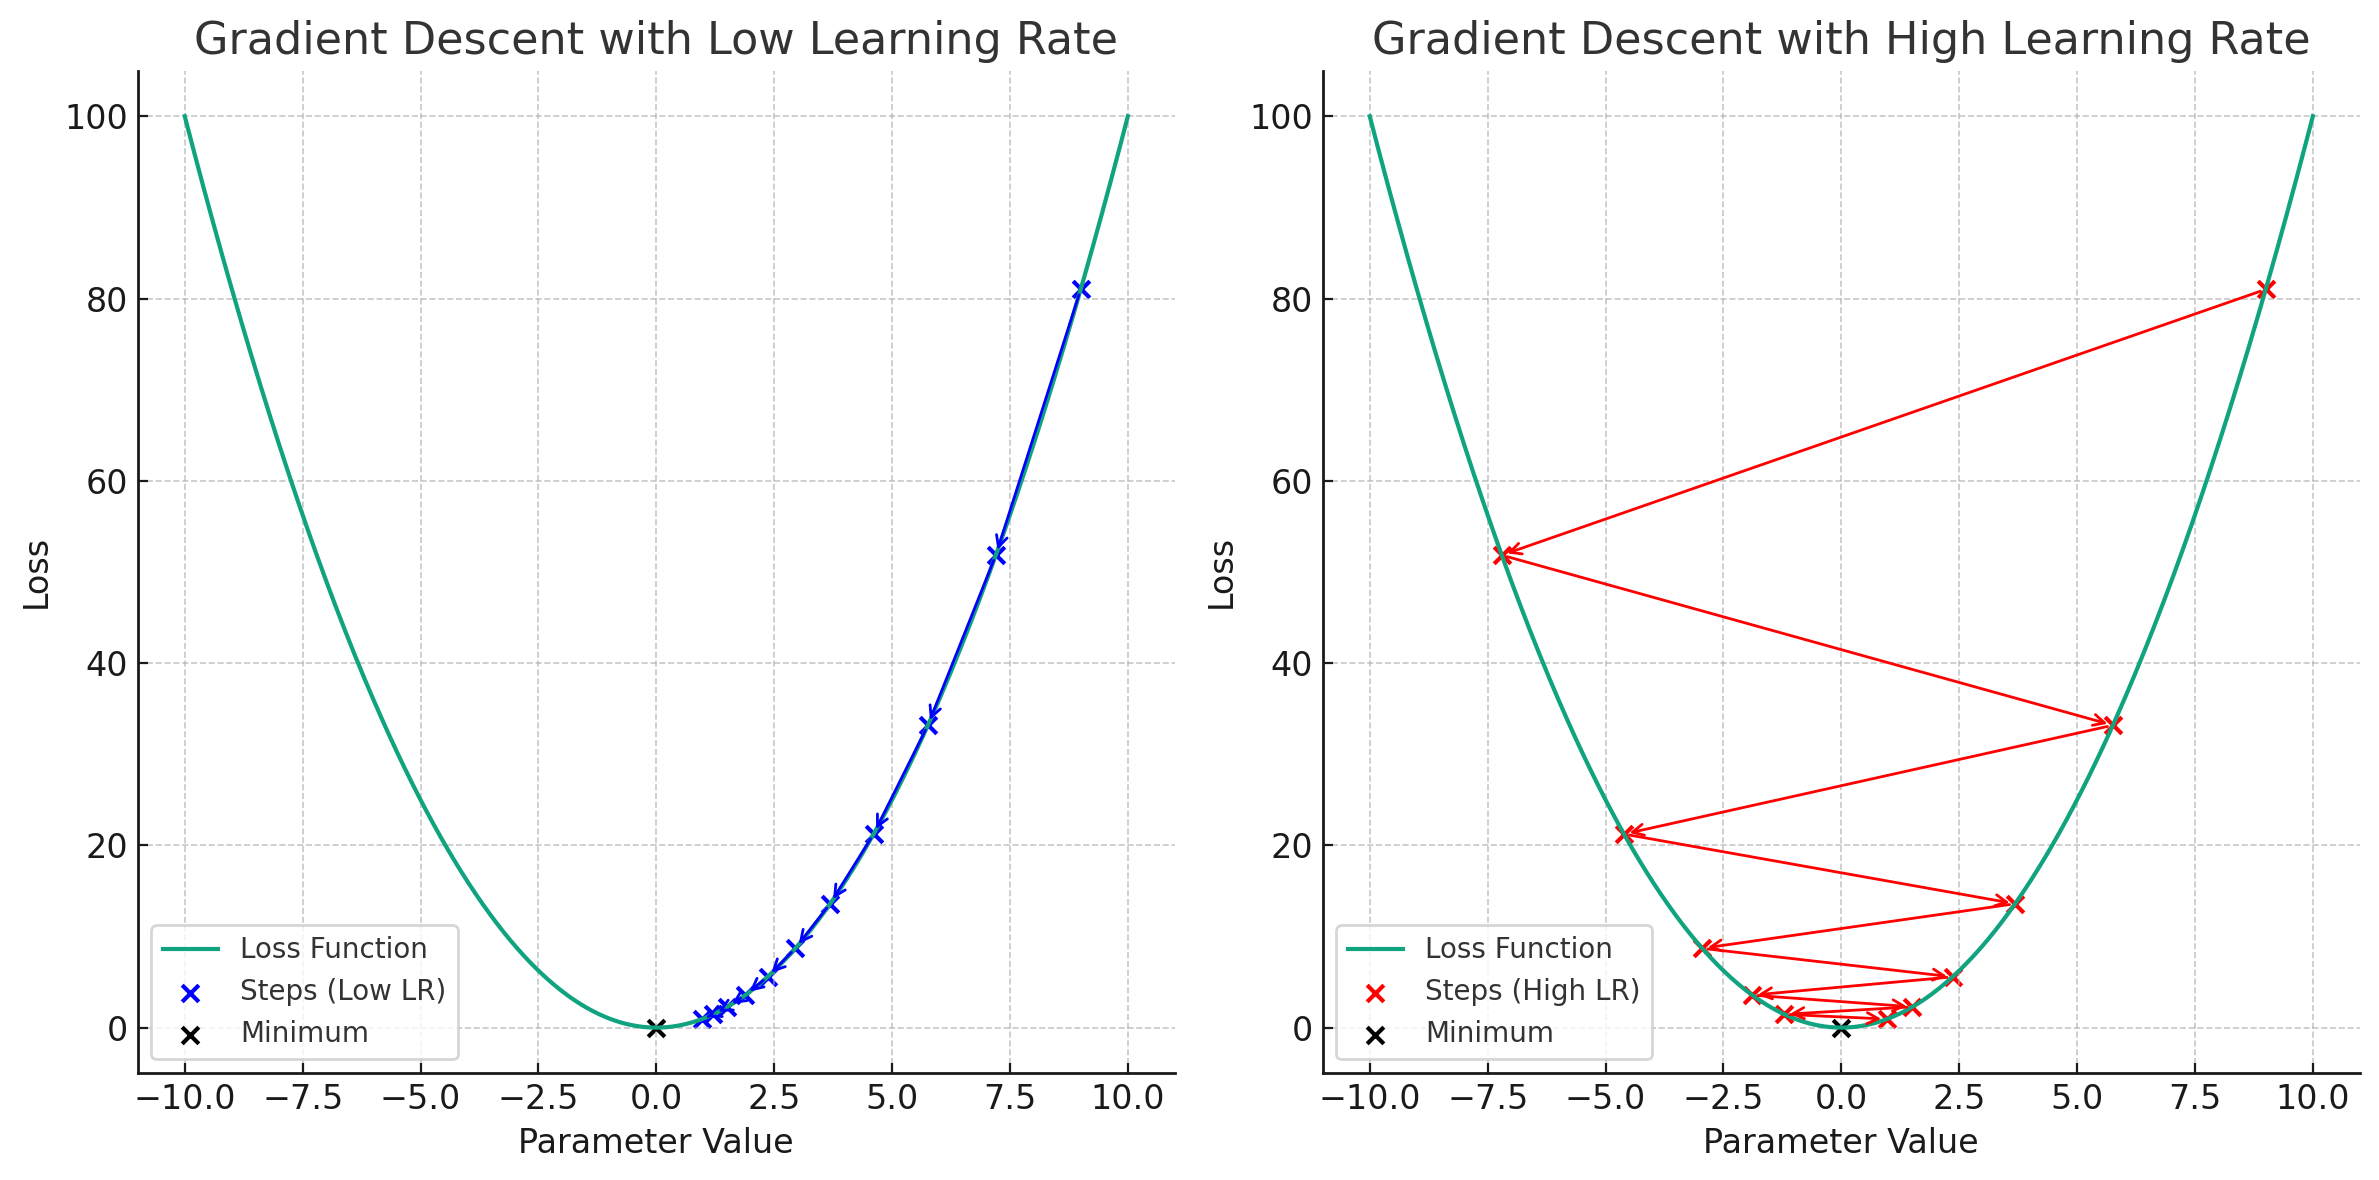

Just because you have identified that your model is underfitting due to a low learning rate, be careful not to set the learning rate too high. To find the godilocks value, be patient and make sensible small adjustments.

**Q4. Below in the two cells below, examine what happens when you set the `alpha` value to 1 and 1e-10 respectively. You may keep the `max_iterations` as 100.** 

<span style="background-color: #FFD700">**Write your code below**</span> 

In [ ]:
# Alpha value of 1

# Fit the model on the training data

# Evaluate the model on the validation data

In [ ]:
# Alpha value of 0.1

# Fit the model on the training data

# Evaluate the model on the validation data

**Q5. What are the results that you see when changing the alpha value? If the learning rate is too small, what can you do to make sure that model converges (besides changeing the alpha value of course)?**

<span style="background-color: #FFD700">**Write Answer Here**</span> .

## Final Testing

Now that we have reviewed the complete process of training our model and tuning hyperparameters, it's finally time for us to evaluate our models on the test dataset. Below, =predict on not the validation set, but on our test set and see how it performs.

**Q6. As we have altered and explored different hyperparameter values for our model, retrain the model below with what you believe are the best hyperparameter values and evaluate your model on the test dataset.** 

<span style="background-color: #FFD700">**Write your code below**</span> 

In [ ]:
from sklearn.metrics import accuracy_score

## Graded Exercises (5 marks)

**GQ1. Your friend's logistic regression model is not performing optimally despite converging to a stable loss value. You suspect that the model has settled into a local minimum rather than the global minimum. Explain how adjusting the learning rate (alpha) higher might help the model escape this local minimum. Use the analogy of a landscape to describe the loss function and explain the impact of changing the learning rate. (1 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

**GQ2. For the validation set we arbitrarly chose to have the set be 15% of the original dataset. Lets alter that. Lets set the percentages to 60% for training 20% for validation and 20% for testing. (1 mark)** 

<span style="background-color: #FFD700">**Write your code below**</span> 

**GQ3. Given the iterative nature of gradient descent in optimizing logistic regression models, describe a scenario where using a smaller step size (learning rate) might be more beneficial than a larger one. (1 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

**GQ4. As we touched on earlier, logistic regression is built off of linear regression. By yourself, research what is the differences between these two models and write one similarity and one difference between them. Finally explain why logistic regression is a better fit for binary classification tasks. (2 marks)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

## Conclusion

In this module, we explored the concept of "training" as it applies to logistic regression models. We delved into the gradient descent method, which is a common technique used by various machine learning models, including logistic regression, to minimize their loss function. This mathematical representation quantifies how "correct" our model's predictions are. Additionally, we discussed hyperparameters, which are variables set by us, the users, that influence the training process. This contrasts with the weights determined by the model during training. We also examined the role of a validation set. This set comprises data separated from the training dataset, used to refine hyperparameters effectively without relying on the test set, thereby avoiding the risk of overfitting. Lastly, we addressed the challenges associated with tuning hyperparameters, particularly the impact of choosing suboptimal learning rates and epoch numbers on the model's performance.